In [ ]:
# Sales Forecasting using Power BI and Python

In [12]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [13]:
# Step 2: Load Dataset
df = pd.read_csv("Sales_forecast_sample.csv")
print(df.head())


         Date    Product Region  Sales  Quantity Customer_Segment
0  2023-01-01  Product A  North   5693        10           Retail
1  2023-01-02  Product B  South   5872        13        Wholesale
2  2023-01-03  Product C   East   5719        15           Online
3  2023-01-04  Product D   West   5381        15        Corporate
4  2023-01-05  Product A  North   5596        14           Retail


In [14]:
# Step 3: Data Preprocessing
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              100 non-null    datetime64[ns]
 1   Product           100 non-null    object        
 2   Region            100 non-null    object        
 3   Sales             100 non-null    int64         
 4   Quantity          100 non-null    int64         
 5   Customer_Segment  100 non-null    object        
 6   Month             100 non-null    int32         
 7   Year              100 non-null    int32         
dtypes: datetime64[ns](1), int32(2), int64(2), object(3)
memory usage: 5.6+ KB
None


In [19]:
import pandas as pd

# Load the dataset
data = pd.read_csv("Sales_forecast_sample.csv")

# Check if loaded properly
print(data.head())
print(data.columns)

         Date    Product Region  Sales  Quantity Customer_Segment
0  2023-01-01  Product A  North   5693        10           Retail
1  2023-01-02  Product B  South   5872        13        Wholesale
2  2023-01-03  Product C   East   5719        15           Online
3  2023-01-04  Product D   West   5381        15        Corporate
4  2023-01-05  Product A  North   5596        14           Retail
Index(['Date', 'Product', 'Region', 'Sales', 'Quantity', 'Customer_Segment'], dtype='object')


First 5 Rows of Data:
        Date    Product Region  Sales  Quantity Customer_Segment
0 2023-01-01  Product A  North   5693        10           Retail
1 2023-01-02  Product B  South   5872        13        Wholesale
2 2023-01-03  Product C   East   5719        15           Online
3 2023-01-04  Product D   West   5381        15        Corporate
4 2023-01-05  Product A  North   5596        14           Retail

Summary Statistics:
                      Date         Sales    Quantity
count                  100    100.000000  100.000000
mean   2023-02-19 12:00:00   7968.910000   36.610000
min    2023-01-01 00:00:00   5381.000000   10.000000
25%    2023-01-25 18:00:00   6789.250000   24.750000
50%    2023-02-19 12:00:00   8017.500000   36.500000
75%    2023-03-16 06:00:00   9193.000000   49.000000
max    2023-04-10 00:00:00  10874.000000   62.000000
std                    NaN   1468.621473   14.689304

Missing Values:
Date                0
Product             0
Region              0
Sales  

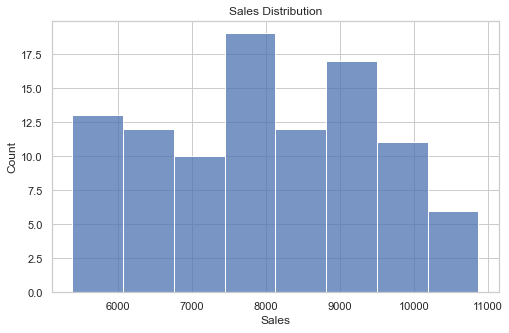

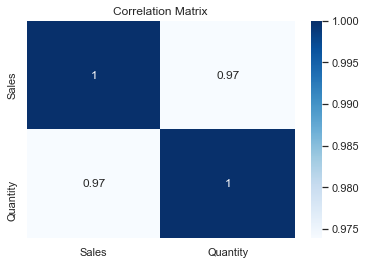

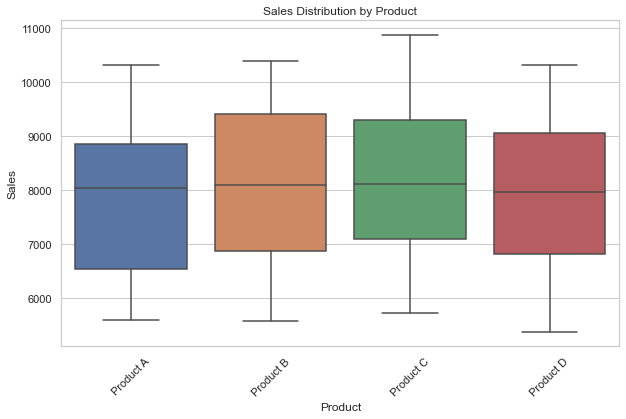

In [44]:
# Step 4: Exploratory Data Analysis (EDA)
import seaborn as sns
import matplotlib.pyplot as plt

# View first few rows
print("First 5 Rows of Data:")
print(data.head())

# Summary statistics
print("\nSummary Statistics:")
print(data.describe())

# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())

# Sales Distribution
plt.figure(figsize=(8,5))
sns.histplot(data['Sales'])
plt.title('Sales Distribution')
plt.xlabel('Sales')
plt.show()

# Correlation Heatmap
plt.figure(figsize=(6,4))
sns.heatmap(data[['Sales', 'Quantity']].corr(), annot=True, cmap='Blues')
plt.title('Correlation Matrix')
plt.show()


# Boxplot for Sales by Product
plt.figure(figsize=(10,6))
sns.boxplot(x='Product', y='Sales', data=data)
plt.title('Sales Distribution by Product')
plt.xlabel('Product')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.show()

Product     Product A  Product B  Product C  Product D
Date                                                  
2023-01-01     5693.0        NaN        NaN        NaN
2023-01-02        NaN     5872.0        NaN        NaN
2023-01-03        NaN        NaN     5719.0        NaN
2023-01-04        NaN        NaN        NaN     5381.0
2023-01-05     5596.0        NaN        NaN        NaN
...               ...        ...        ...        ...
2023-04-06        NaN        NaN        NaN    10114.0
2023-04-07    10185.0        NaN        NaN        NaN
2023-04-08        NaN     9930.0        NaN        NaN
2023-04-09        NaN        NaN    10874.0        NaN
2023-04-10        NaN        NaN        NaN    10328.0

[100 rows x 4 columns]


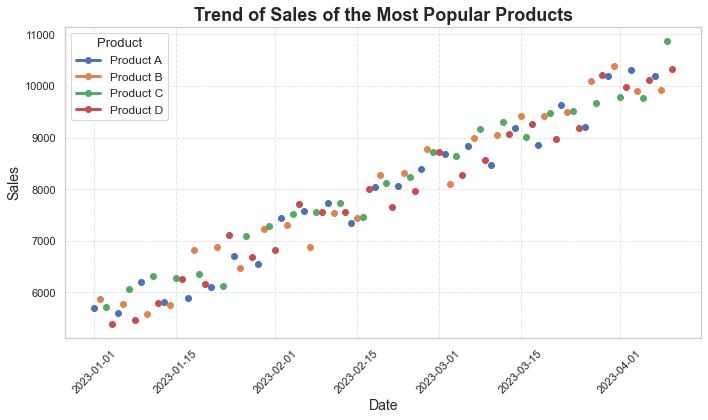

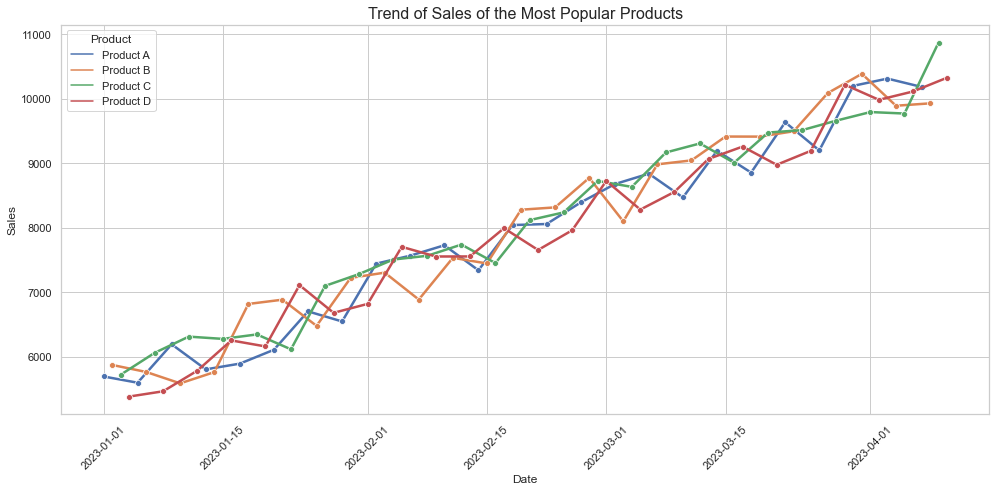

In [46]:
# correlation Sales over Time
# Convert Date to datetime
data['Date'] = pd.to_datetime(data['Date'])

# Create pivot table
pivot_data = data.pivot_table(index='Date', columns='Product', values='Sales', aggfunc='sum')

# Show Pivot data
print(pivot_data)

# Plot
plt.figure(figsize=(10,6))

for column in pivot_data.columns:
    plt.plot(pivot_data.index.to_list(), 
             pivot_data[column].to_list(), 
             label=column, 
             linewidth=3, 
             marker='o', 
             linestyle='-')

# Styling
plt.title('Trend of Sales of the Most Popular Products', fontsize=18, fontweight='bold')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Sales', fontsize=14)
plt.legend(title='Product', fontsize=12, title_fontsize=13)
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot
plt.figure(figsize=(14,7))

# Convert pivot table to long format for seaborn
pivot_data_reset = pivot_data.reset_index()
pivot_long = pd.melt(pivot_data_reset, id_vars=['Date'], var_name='Product', value_name='Sales')

# Plot line graph
sns.lineplot(data=pivot_long, x='Date', y='Sales', hue='Product', marker='o', linewidth=2.5)

plt.title('Trend of Sales of the Most Popular Products', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend(title='Product')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
